#**Fake Curruency Detection using CNN based image classification**
**Done by Sharvesh Subhash**

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Currency-Dataset/Train'
valid_path = '../content/drive/MyDrive/Currency-Dataset/Test'

In [ ]:
folders = glob('/content/drive/MyDrive/Currency-Dataset/Train/*')

In [ ]:
folders

['/content/drive/MyDrive/Currency-Dataset/Train/1Hundrednote',
 '/content/drive/MyDrive/Currency-Dataset/Train/2Hundrednote',
 '/content/drive/MyDrive/Currency-Dataset/Train/2Thousandnote',
 '/content/drive/MyDrive/Currency-Dataset/Train/5Hundrednote',
 '/content/drive/MyDrive/Currency-Dataset/Train/Fiftynote',
 '/content/drive/MyDrive/Currency-Dataset/Train/Tennote',
 '/content/drive/MyDrive/Currency-Dataset/Train/Twentynote']

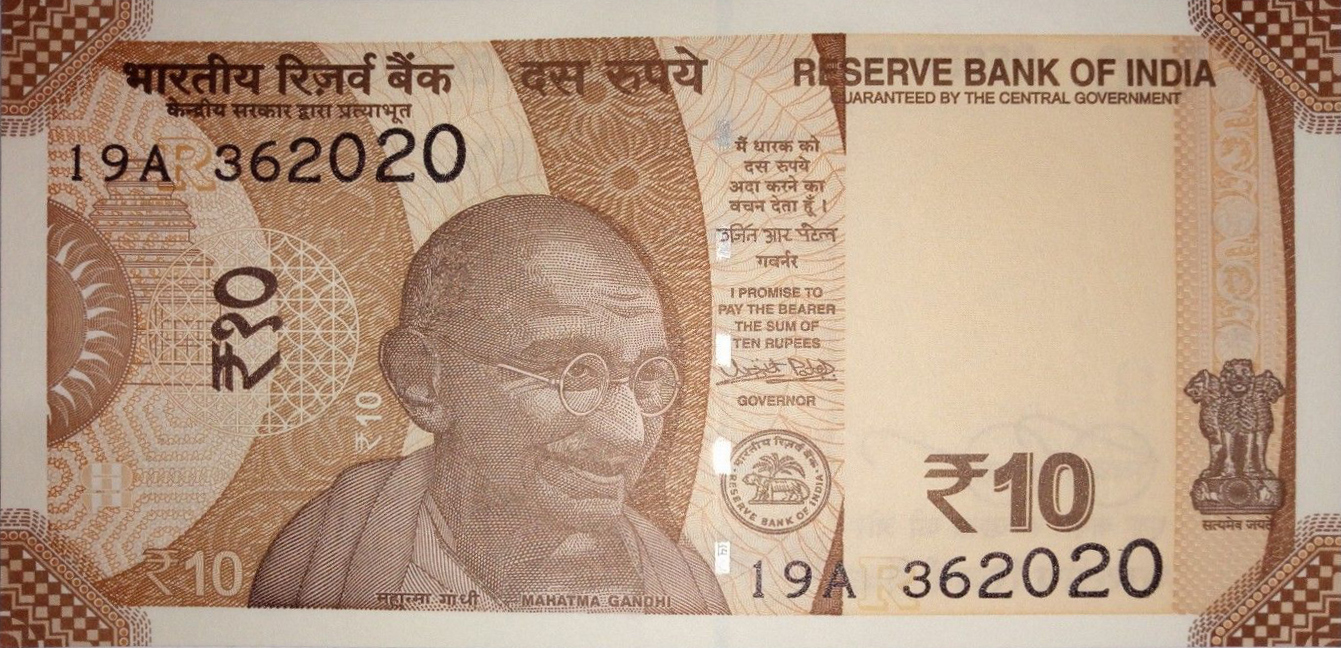

In [ ]:
exampleofdataset= image.load_img('/content/drive/MyDrive/Currency-Dataset/Train/Tennote/1.jpg')
exampleofdataset

In [ ]:
exampleofdataset.height

648

In [ ]:
exampleofdataset.width

1341

In [ ]:
Classifier=Sequential()

Classifier.add(Conv2D(32,(3,3), input_shape=(224,224,3), activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Flatten())

Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 7, activation = 'softmax'))

In [ ]:
Classifier.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

**Here we are rescaling the images of dataset to the size of 224 as they are not uniform and are varying in size, and that is not good for image classification using CNNs.**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   featurewise_center=True,
                                   rotation_range=0.4,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,)

**We will be processing the whole dataset batch wise, with 32 images in one batch**

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Currency-Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 153 images belonging to 7 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Currency-Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 42 images belonging to 7 classes.


Now, fitting the CNN model with the training images and with validation dataset as testing images

In [ ]:
# fit the model
from PIL import _imaging
from PIL import Image
import PIL
# Run the cell. It will take some time to execute
r = Classifier.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-22-86347eaea2e8>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = Classifier.fit_generator(
/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 9.0255 - accuracy: 0.1961

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


5/5 [==============================] - 53s 9s/step - loss: 9.0255 - accuracy: 0.1961 - val_loss: 4.1077 - val_accuracy: 0.2381
Epoch 2/50
5/5 [==============================] - 3s 711ms/step - loss: 2.4912 - accuracy: 0.2222 - val_loss: 1.9356 - val_accuracy: 0.2619
Epoch 3/50
5/5 [==============================] - 3s 704ms/step - loss: 1.9478 - accuracy: 0.1765 - val_loss: 1.9157 - val_accuracy: 0.1429
Epoch 4/50
5/5 [==============================] - 3s 695ms/step - loss: 1.8660 - accuracy: 0.2353 - val_loss: 1.8711 - val_accuracy: 0.2619
Epoch 5/50
5/5 [==============================] - 3s 679ms/step - loss: 1.7224 - accuracy: 0.3660 - val_loss: 1.7030 - val_accuracy: 0.2619
Epoch 6/50
5/5 [==============================] - 4s 905ms/step - loss: 1.5139 - accuracy: 0.3987 - val_loss: 1.6419 - val_accuracy: 0.3095
Epoch 7/50
5/5 [==============================] - 3s 677ms/step - loss: 1.3058 - accuracy: 0.5033 - val_loss: 1.3715 - val_accuracy: 0.3810
Epoch 8/50
5/5 [=================

In [ ]:
r.history

{'loss': [9.025546073913574,
  2.4912450313568115,
  1.947806715965271,
  1.8660311698913574,
  1.7224277257919312,
  1.5139206647872925,
  1.3057702779769897,
  1.056243896484375,
  1.0029469728469849,
  0.7577754855155945,
  0.5842572450637817,
  0.5469438433647156,
  0.4791455864906311,
  0.410829097032547,
  0.3315337300300598,
  0.2456686794757843,
  0.3736076056957245,
  0.4475661516189575,
  0.3600989878177643,
  0.21097268164157867,
  0.26408591866493225,
  0.1888636201620102,
  0.19416756927967072,
  0.13677239418029785,
  0.11082250624895096,
  0.08493535220623016,
  0.06201224774122238,
  0.04912451654672623,
  0.05997824668884277,
  0.05690544843673706,
  0.0371265709400177,
  0.03289478272199631,
  0.02532416768372059,
  0.027269164100289345,
  0.023502128198742867,
  0.035282205790281296,
  0.023636648431420326,
  0.025270923972129822,
  0.025974716991186142,
  0.016472404822707176,
  0.017217764630913734,
  0.01341171469539404,
  0.011270612478256226,
  0.008538413792848

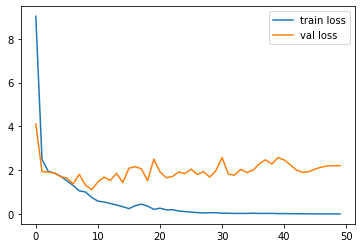

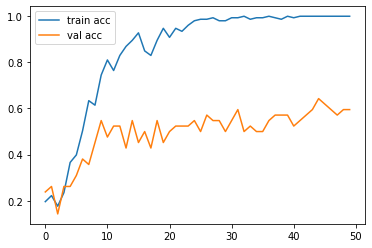

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

Given the factors of training image quality or resolution, we have got the above accuracy trend.

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

Classifier.save('model_Classifier.h5')

In [ ]:
y_pred = Classifier.predict(test_set)

2/2 [==============================] - 1s 133ms/step


In [ ]:
y_pred

array([[4.21061628e-02, 3.68671399e-03, 2.74328449e-09, 6.25688195e-01,
        1.48968861e-01, 1.07040003e-01, 7.25099817e-02],
       [8.64036519e-06, 2.12142968e-05, 1.15947130e-09, 9.76094161e-05,
        4.80193383e-04, 9.99314070e-01, 7.82072166e-05],
       [1.99347742e-05, 8.13445936e-13, 6.87230628e-09, 1.12322123e-05,
        9.99626994e-01, 3.28216731e-04, 1.36039189e-05],
       [9.99938726e-01, 1.96243247e-11, 4.08555825e-05, 2.01227049e-05,
        2.00329197e-07, 6.85053837e-12, 1.84190610e-16],
       [4.15183931e-05, 1.46552712e-01, 6.48177258e-12, 7.15905607e-01,
        1.31336231e-09, 1.36353046e-01, 1.14709628e-03],
       [2.67074768e-07, 4.52000042e-03, 1.07175609e-10, 1.08231800e-02,
        1.24663393e-05, 9.76768062e-02, 8.86967242e-01],
       [9.99998093e-01, 2.71829179e-19, 3.95334654e-09, 1.95920461e-06,
        9.00844260e-11, 8.06474760e-17, 8.15171501e-19],
       [3.21287313e-04, 9.51217771e-01, 1.47031449e-06, 2.52169976e-03,
        4.56492824e-04, 4

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([3, 5, 4, 0, 3, 6, 0, 1, 2, 2, 3, 5, 2, 1, 4, 4, 3, 1, 6, 6, 0, 0,
       3, 6, 2, 4, 6, 0, 4, 2, 2, 6, 0, 4, 3, 3, 1, 5, 0, 1, 0, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_Classifier.h5')

In [ ]:
img=image.load_img('../content/drive/MyDrive/Currency-Dataset/Test/1Hundrednote/1.jpg',target_size=(224,224))

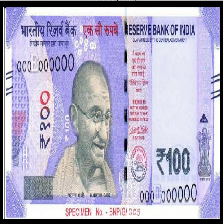

In [ ]:
img

Here, we can clearly see, how the 100 INR note is compressed to a 224x224 pixel based image. All images in the test and train were all transformed to this size previously

In [ ]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

In [ ]:
result = Classifier.predict(test_image)
result

1/1 [==============================] - 0s 125ms/step


array([[1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(test_image), axis=1)

1/1 [==============================] - 0s 55ms/step


In [ ]:
a==5

array([False])

In [ ]:
a==0

array([ True])

We can clearly see from the above result that the prediction model is clearly working as Rs.100 image is assigned the index 0, in those 7 classification folders assigned as 0 to 6.

#**Done by Sharvesh Subhash on 30th January as my capstone project**